In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict

## Configuration

In [2]:
# Path where the results are stored
RESULTS_PATH = '../../../results'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 22

In [3]:
models = ['{} {} {}'.format(model, dataset, samples) for model in ['RF', 'XGB', 'KNN', 'SVM'] for samples in ['', 'with previous timesteps'] for dataset in ['all experiments', 'only without skin']]
labels = ['{} F{}'.format(joint, force) for joint in ['HIP', 'KNEE', 'ANKLE'] for force in ['x', 'y']]
scores = ['MAE', 'MSE', 'R2']

## Final results analysis

In [4]:
# Load final results excel
results_excel = pd.read_excel(RESULTS_PATH + '/final_results.xlsx')
results_df = results_excel.iloc[:, 0:7]
results_df.columns = ['SCORE'] + [l.replace(' ', '_').upper() for l in labels]
results_df = results_df.dropna()
results_df = results_df.reset_index(drop=True)
results_df['MODEL'] = [model for model in models for s in scores] 
results_df

,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments
1,MSE,154.4415 ± 67.1123,603.6202 ± 564.7993,164.5952 ± 107.9920,119.2882 ± 72.6563,28.5209 ± 7.5418,19.6230 ± 6.5634,RF all experiments
2,R2,0.4526 ± 0.2488,0.1768 ± 0.1818,0.6919 ± 0.0701,0.5386 ± 0.1537,0.7625 ± 0.0731,0.6120 ± 0.0117,RF all experiments
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only without skin
4,MSE,99.7687 ± 22.1525,442.3694 ± 423.0300,73.9608 ± 40.8987,134.3254 ± 107.1454,27.6208 ± 0.9377,25.2174 ± 10.0133,RF only without skin
5,R2,0.6982 ± 0.1102,0.4966 ± 0.0180,0.8212 ± 0.0750,0.6327 ± 0.1408,0.8421 ± 0.0032,0.3955 ± 0.2600,RF only without skin
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps
7,MSE,169.8119 ± 66.5766,583.6648 ± 541.4207,169.9792 ± 104.9718,144.5720 ± 92.1812,31.3977 ± 8.5677,22.0246 ± 8.7874,RF all experiments with previous timesteps
8,R2,0.3987 ± 0.2483,0.1671 ± 0.1349,0.6699 ± 0.0429,0.4605 ± 0.1779,0.7385 ± 0.0826,0.5741 ± 0.0444,RF all experiments with previous timesteps
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only without skin with previous timesteps


In [5]:
for col in [l.replace(' ', '_').upper() for l in labels]:
    results_df[col + '_MEAN'] = results_df[col].apply(lambda x: float(x.split(' ± ')[0]))    
    results_df[col + '_STD'] = results_df[col].apply(lambda x: float(x.split(' ± ')[1]))
    
results_df

,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments,8.8001,2.1029,11.4433,7.7425,7.9304,2.5871,7.0257,2.7806,3.5851,0.2813,2.9905,0.3252
1,MSE,154.4415 ± 67.1123,603.6202 ± 564.7993,164.5952 ± 107.9920,119.2882 ± 72.6563,28.5209 ± 7.5418,19.6230 ± 6.5634,RF all experiments,154.4415,67.1123,603.6202,564.7993,164.5952,107.9920,119.2882,72.6563,28.5209,7.5418,19.6230,6.5634
2,R2,0.4526 ± 0.2488,0.1768 ± 0.1818,0.6919 ± 0.0701,0.5386 ± 0.1537,0.7625 ± 0.0731,0.6120 ± 0.0117,RF all experiments,0.4526,0.2488,0.1768,0.1818,0.6919,0.0701,0.5386,0.1537,0.7625,0.0731,0.6120,0.0117
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only without skin,7.3001,0.4309,9.6592,6.4626,5.9083,1.8513,7.3614,3.7981,3.7734,0.0795,3.3837,0.5167
4,MSE,99.7687 ± 22.1525,442.3694 ± 423.0300,73.9608 ± 40.8987,134.3254 ± 107.1454,27.6208 ± 0.9377,25.2174 ± 10.0133,RF only without skin,99.7687,22.1525,442.3694,423.0300,73.9608,40.8987,134.3254,107.1454,27.6208,0.9377,25.2174,10.0133
5,R2,0.6982 ± 0.1102,0.4966 ± 0.0180,0.8212 ± 0.0750,0.6327 ± 0.1408,0.8421 ± 0.0032,0.3955 ± 0.2600,RF only without skin,0.6982,0.1102,0.4966,0.0180,0.8212,0.0750,0.6327,0.1408,0.8421,0.0032,0.3955,0.2600
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps,9.2864,2.1067,11.5252,7.6244,8.3906,2.3871,8.0092,3.3739,3.6636,0.3494,3.1136,0.4731
7,MSE,169.8119 ± 66.5766,583.6648 ± 541.4207,169.9792 ± 104.9718,144.5720 ± 92.1812,31.3977 ± 8.5677,22.0246 ± 8.7874,RF all experiments with previous timesteps,169.8119,66.5766,583.6648,541.4207,169.9792,104.9718,144.5720,92.1812,31.3977,8.5677,22.0246,8.7874
8,R2,0.3987 ± 0.2483,0.1671 ± 0.1349,0.6699 ± 0.0429,0.4605 ± 0.1779,0.7385 ± 0.0826,0.5741 ± 0.0444,RF all experiments with previous timesteps,0.3987,0.2483,0.1671,0.1349,0.6699,0.0429,0.4605,0.1779,0.7385,0.0826,0.5741,0.0444
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only without skin with previous timesteps,7.6717,0.6706,9.6595,6.3608,6.1569,2.6561,7.6654,4.0669,4.0160,0.2319,3.4169,0.5336


In [6]:
metric_cols = [l.replace(' ', '_').upper() + '_' + m for l in labels for m in ['MEAN', 'STD']]

results_df = results_df[['SCORE', 'MODEL'] + metric_cols]
results_df

,SCORE,MODEL,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
0,MAE,RF all experiments,8.8001,2.1029,11.4433,7.7425,7.9304,2.5871,7.0257,2.7806,3.5851,0.2813,2.9905,0.3252
1,MSE,RF all experiments,154.4415,67.1123,603.6202,564.7993,164.5952,107.9920,119.2882,72.6563,28.5209,7.5418,19.6230,6.5634
2,R2,RF all experiments,0.4526,0.2488,0.1768,0.1818,0.6919,0.0701,0.5386,0.1537,0.7625,0.0731,0.6120,0.0117
3,MAE,RF only without skin,7.3001,0.4309,9.6592,6.4626,5.9083,1.8513,7.3614,3.7981,3.7734,0.0795,3.3837,0.5167
4,MSE,RF only without skin,99.7687,22.1525,442.3694,423.0300,73.9608,40.8987,134.3254,107.1454,27.6208,0.9377,25.2174,10.0133
5,R2,RF only without skin,0.6982,0.1102,0.4966,0.0180,0.8212,0.0750,0.6327,0.1408,0.8421,0.0032,0.3955,0.2600
6,MAE,RF all experiments with previous timesteps,9.2864,2.1067,11.5252,7.6244,8.3906,2.3871,8.0092,3.3739,3.6636,0.3494,3.1136,0.4731
7,MSE,RF all experiments with previous timesteps,169.8119,66.5766,583.6648,541.4207,169.9792,104.9718,144.5720,92.1812,31.3977,8.5677,22.0246,8.7874
8,R2,RF all experiments with previous timesteps,0.3987,0.2483,0.1671,0.1349,0.6699,0.0429,0.4605,0.1779,0.7385,0.0826,0.5741,0.0444
9,MAE,RF only without skin with previous timesteps,7.6717,0.6706,9.6595,6.3608,6.1569,2.6561,7.6654,4.0669,4.0160,0.2319,3.4169,0.5336


In [7]:
# Compute RMSE
scores = ['MAE', 'MSE', 'RMSE', 'R2']

aux_ls = []

for idx, row in results_df.iterrows():
    aux_ls.append(dict(row))
    
    if row['SCORE'] == 'MSE':
        aux_dict = {}
        aux_dict['SCORE'] = 'RMSE'
        aux_dict['MODEL'] = row['MODEL']
        for col in metric_cols:
            aux_dict[col] = np.sqrt(row[col])
        
        aux_ls.append(aux_dict)
    
results_df = pd.DataFrame(aux_ls)
results_df

,SCORE,MODEL,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
0,MAE,RF all experiments,8.800100,2.102900,11.443300,7.742500,7.930400,2.58710,7.025700,2.780600,3.585100,0.281300,2.990500,0.325200
1,MSE,RF all experiments,154.441500,67.112300,603.620200,564.799300,164.595200,107.99200,119.288200,72.656300,28.520900,7.541800,19.623000,6.563400
2,RMSE,RF all experiments,12.427449,8.192210,24.568683,23.765507,12.829466,10.39192,10.921914,8.523866,5.340496,2.746234,4.429786,2.561913
3,R2,RF all experiments,0.452600,0.248800,0.176800,0.181800,0.691900,0.07010,0.538600,0.153700,0.762500,0.073100,0.612000,0.011700
4,MAE,RF only without skin,7.300100,0.430900,9.659200,6.462600,5.908300,1.85130,7.361400,3.798100,3.773400,0.079500,3.383700,0.516700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,R2,SVM all experiments with previous timesteps,0.558300,0.198100,0.178000,0.146900,0.590600,0.06530,0.412400,0.169600,0.769300,0.084400,0.424800,0.060400
60,MAE,SVM only without skin with previous timesteps,8.192800,0.882900,14.149600,10.615000,8.377900,3.25360,9.633900,5.226200,4.493700,0.022400,3.309300,0.204700
61,MSE,SVM only without skin with previous timesteps,143.453400,56.373400,1149.787700,1122.661600,143.297900,95.26130,217.658900,169.118600,32.705200,0.446000,22.028900,0.076800
62,RMSE,SVM only without skin with previous timesteps,11.977203,7.508222,33.908520,33.506143,11.970710,9.76019,14.753267,13.004561,5.718846,0.667832,4.693495,0.277128


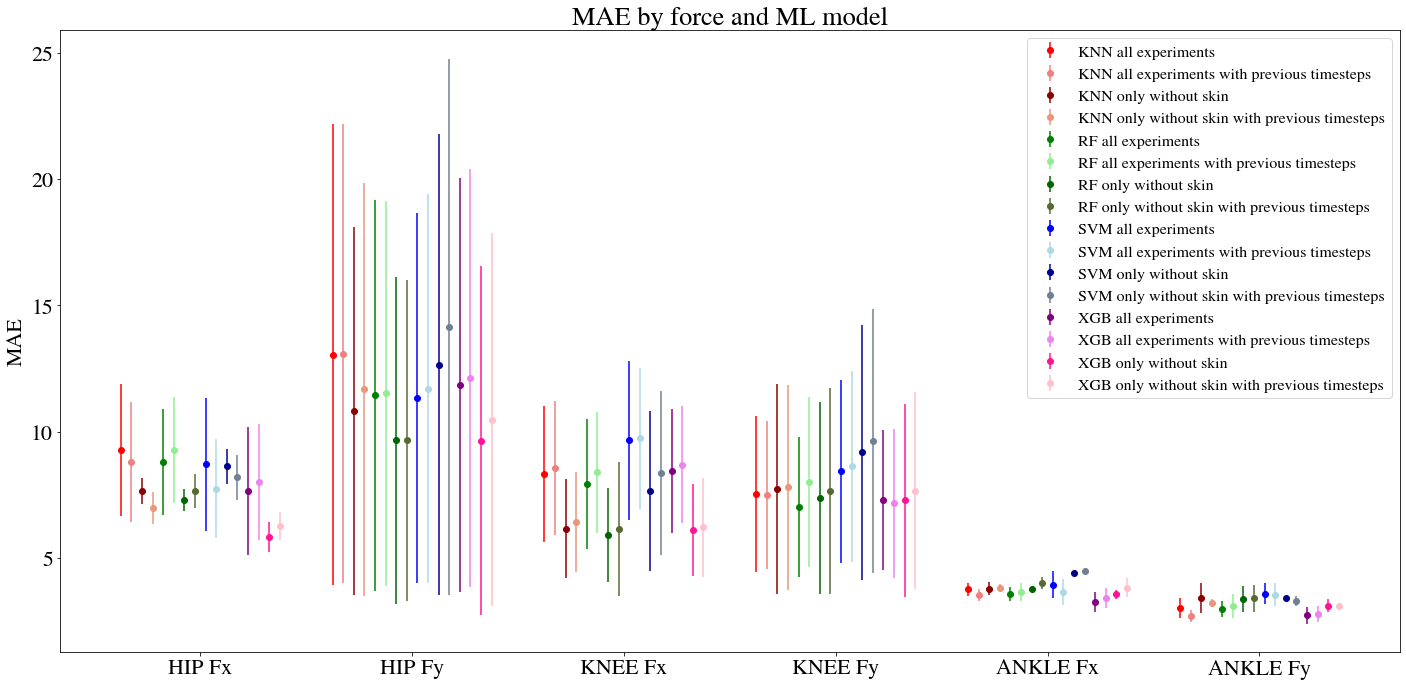

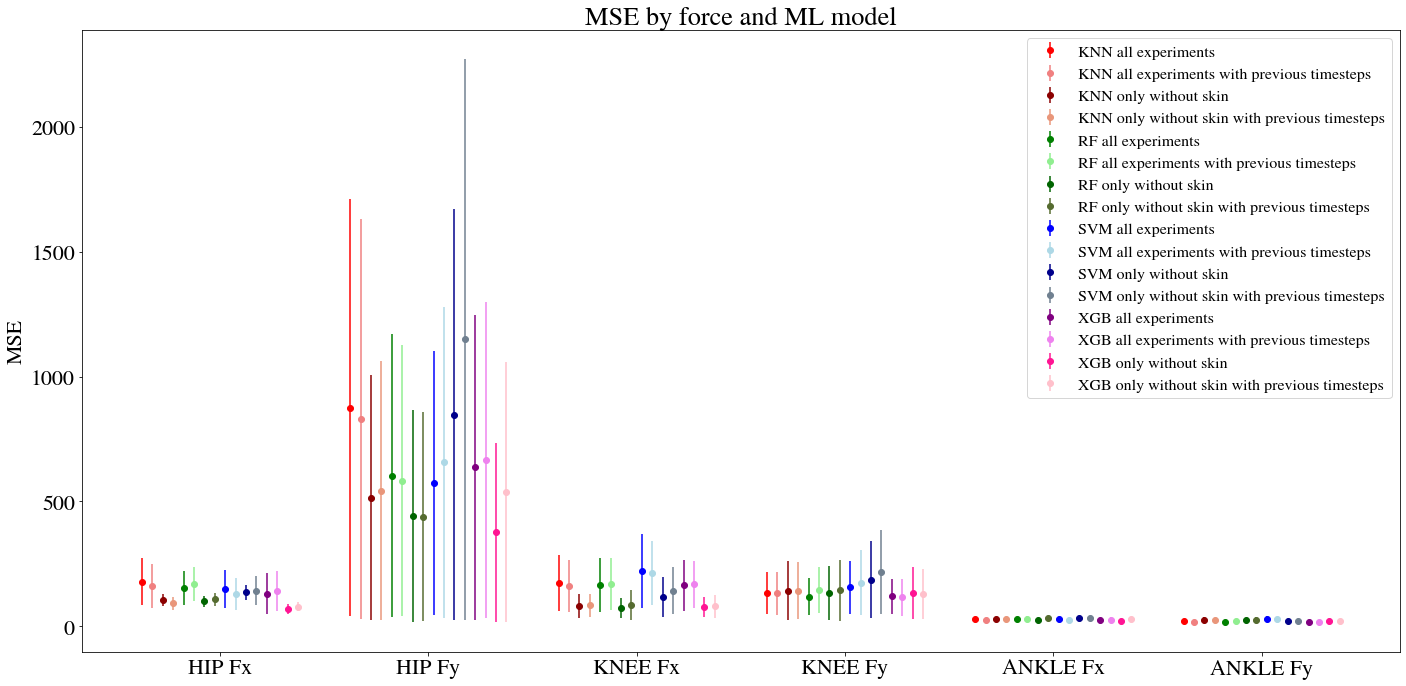

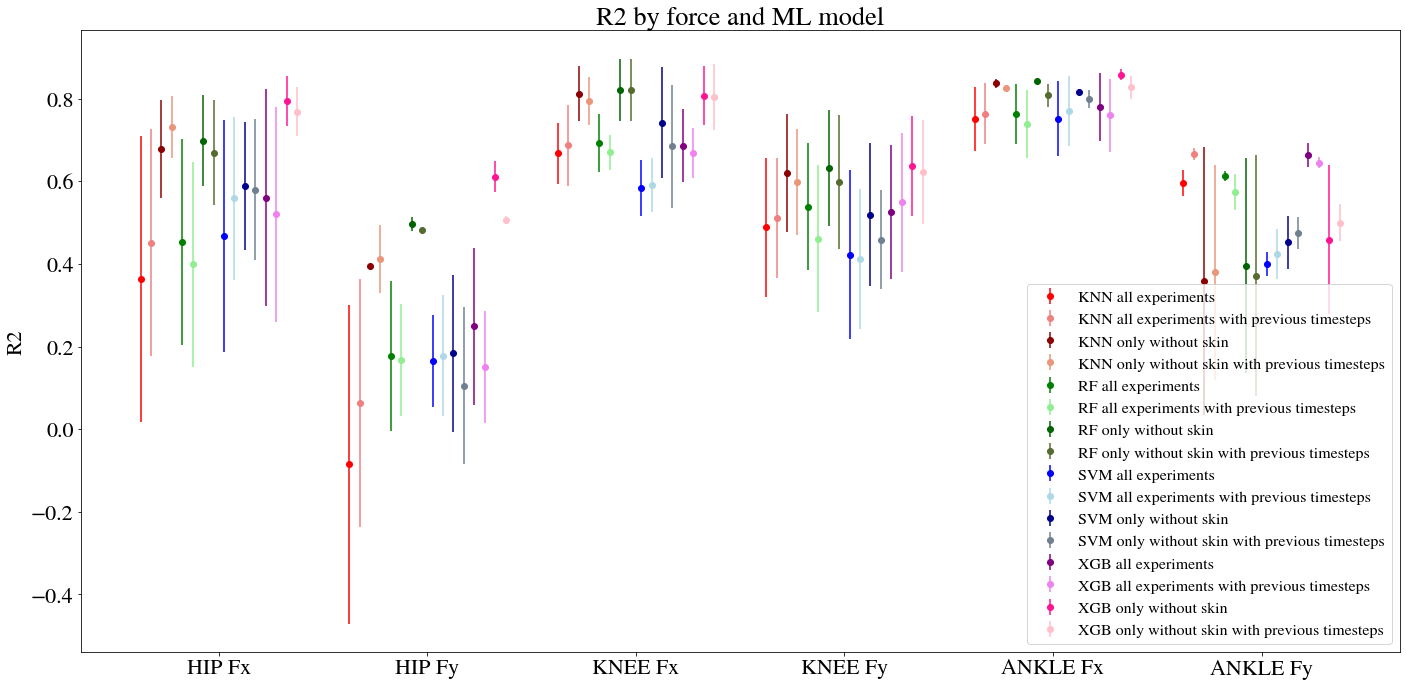

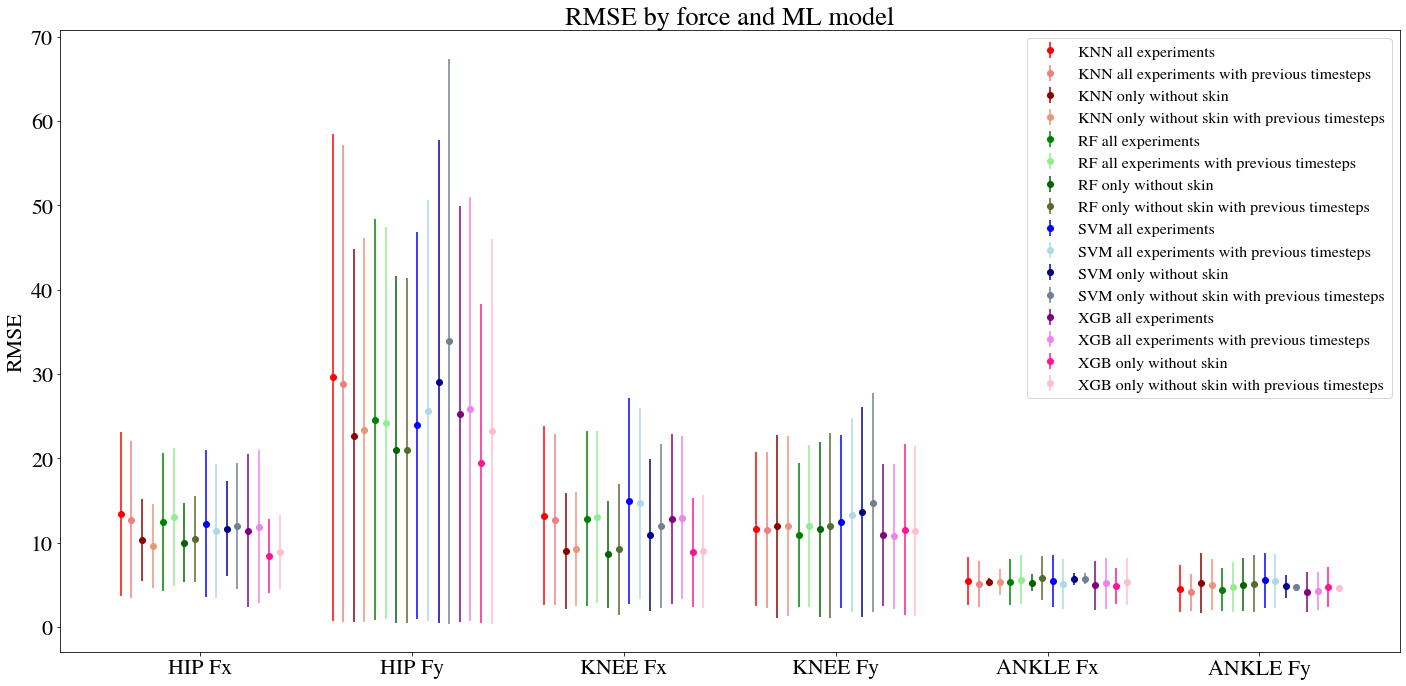

In [8]:
colors = ['red', 'lightcoral', 'darkred', 'darksalmon', 'green', 'lightgreen', 'darkgreen', 'darkolivegreen', 'blue', 'lightblue', 'darkblue', 'slategray', 'purple', 'violet', 'deeppink', 'pink']
width = 0.05  # the width of the bars

x = np.arange(len(labels))  # the label locations
n_models = len(models)
x_models = [-(width*i) + (width/2) for i in range(int(n_models/2), 0, -1)] + [(width*i) - (width/2) for i in range(1, int(n_models/2) + 1, 1)]

assert(len(models) == len(colors))
assert(len(models) == len(x_models))

for score, score_group in results_df.groupby(['SCORE']):
    
    fig, ax = plt.subplots(figsize=(20,10))
    for i, (model, model_group) in enumerate(score_group.groupby(['MODEL'])):
        
        mean_ls = model_group[[l.replace(' ', '_').upper() + '_MEAN' for l in labels]].values[0]
        std_ls = model_group[[l.replace(' ', '_').upper() + '_STD' for l in labels]].values[0]
        assert(len(labels) == len(mean_ls))
        assert(len(labels) == len(std_ls))
    
        rects = ax.errorbar(x + x_models[i], mean_ls, yerr=std_ls, linestyle='None', marker='o', label=model, color=colors[i])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title('{} by force and ML model'.format(score))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(prop={'size': 16})

    fig.tight_layout()

    plt.show()

In [9]:
# Mean +- standard deviation of each group joint-force
for label in labels:
    for score in scores:
        print(label, score)
        m = results_df[results_df['SCORE'] == score][label.upper().replace(' ', '_') + '_MEAN']
        s = results_df[results_df['SCORE'] == score][label.upper().replace(' ', '_') + '_STD']
        print('{:.4f} ± {:.4f}'.format(np.mean(m), np.std(s)))

HIP Fx MAE
7.9282 ± 0.8750
HIP Fx MSE
128.3392 ± 26.9235
HIP Fx RMSE
11.2375 ± 1.9492
HIP Fx R2
0.5799 ± 0.0870
HIP Fy MAE
11.5555 ± 1.0770
HIP Fy MSE
642.4463 ± 189.2620
HIP Fy RMSE
25.0863 ± 3.6303
HIP Fy R2
0.2659 ± 0.1057
KNEE Fx MAE
7.6764 ± 0.4599
KNEE Fx MSE
136.5117 ± 33.1671
KNEE Fx RMSE
11.4855 ± 1.8592
KNEE Fx R2
0.7206 ± 0.0263
KNEE Fy MAE
7.8707 ± 0.7103
KNEE Fy MSE
145.6742 ± 27.2539
KNEE Fy RMSE
12.0254 ± 1.2898
KNEE Fy R2
0.5371 ± 0.0229
ANKLE Fx MAE
3.7870 ± 0.1514
ANKLE Fx MSE
28.7073 ± 3.4170
ANKLE Fx RMSE
5.3515 ± 0.9259
ANKLE Fx R2
0.7929 ± 0.0346
ANKLE Fy MAE
3.1851 ± 0.1585
ANKLE Fy MSE
22.8765 ± 3.7379
ANKLE Fy RMSE
4.7649 ± 0.9521
ANKLE Fy R2
0.4982 ± 0.1102
